----
#**Holistic Analysis of Hotel Review Data: Insights and Predictions Using NLP**

**Introduction**

*In this project, an extensive exploration and analysis have been conducted on hotel reviews to understand and extract key insights. The primary goal is to delve into the vast repository of hotel review data, aggregating and analyzing positive and negative reviews to unveil trends, sentiments, and sentiments expressed by the reviewers. Additionally, the project aims to apply Natural Language Processing (NLP) techniques for text preprocessing, followed by machine learning models to predict reviewer scores based on the text content of the reviews. By integrating NLP methodologies and predictive modeling, this project endeavors to offer a comprehensive understanding of hotel reviews, providing valuable insights and predictive tools for potential applications within the hospitality industry.*

**Technologies** Python, Jupyter Notebook, Pandas, NumPy, Matplotlib, Seaborn, scikit-learn (sklearn), NLTK






----

#Tasks

Concatenate negative reviews and positive reviews together in a new column.

Note: *Cleaning is needed for case where No negative or No Positive review is given check for this*

1. Lower Case that column
2. Remove Stop words
3. Remove punctuations
4. Apply Lemmitization/Stemming (Check accuracy with both)
5. Apply TFIDF/Count vectorizer
6. Apply model on target column Reviewer_Score

Compare results for both TF/IDF and Count vectorizer

----

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '/content/gdrive/MyDrive/NLP_Projects/Hotel_Reviews.csv'
df_raw = pd.read_csv(path)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [6]:
df_raw.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [7]:
df_raw.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [8]:
df_raw.shape

(515738, 17)

----
#**Data Preprocessing & Cleaning**
----

*Performed in Machine learning Part*

In [9]:
df = df_raw

----
**Tasks**

----

1. How many reviewers from each nation

  *   Highest reviewers from which nationality
  *   Lowest Reviewers from which nationality

In [10]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [11]:
numOfReviewers = df.groupby('Reviewer_Nationality', as_index = False).size()
#print(numOfReviewers)

numOfReviewers_sorted =  numOfReviewers.sort_values(by = 'size', ascending = False)
print(numOfReviewers_sorted)

           Reviewer_Nationality    size
214             United Kingdom   245246
216   United States of America    35437
14                   Australia    21686
98                     Ireland    14827
213       United Arab Emirates    10235
..                          ...     ...
8                     Anguilla        1
39                  Cape Verde        1
150   Northern Mariana Islands        1
194         Svalbard Jan Mayen        1
154                      Palau        1

[227 rows x 2 columns]


In [12]:
print("Highest Reviewers are from: \n", numOfReviewers_sorted.iloc[0])
print()
print("Lowest Reviewers are from: \n", numOfReviewers_sorted.iloc[-1])

Highest Reviewers are from: 
 Reviewer_Nationality     United Kingdom 
size                              245246
Name: 214, dtype: object

Lowest Reviewers are from: 
 Reviewer_Nationality     Palau 
size                          1
Name: 154, dtype: object


2. Property with best review_score overall and least score overall

In [13]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [14]:
df_task2 = df[['Hotel_Name','Reviewer_Score']]

In [15]:
review_score_sorted = df_task2.sort_values(by = 'Reviewer_Score', ascending = False)

In [16]:
print('Highest Score: \n', review_score_sorted.iloc[0])
print()
print('Lowest Score: \n', review_score_sorted.iloc[-1])

Highest Score: 
 Hotel_Name        Golden Tulip Bercy Gare de Lyon 209
Reviewer_Score                                   10.0
Name: 103357, dtype: object

Lowest Score: 
 Hotel_Name        Golden Tulip Washington Opera
Reviewer_Score                              2.5
Name: 205600, dtype: object



3. Do a scatter plot to show all properties over lat and long

In [17]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [18]:
df_plotting = df[['lat','lng']]

In [19]:
df_plotting.isna().sum()

lat    3268
lng    3268
dtype: int64

In [20]:
df_plotting = df_plotting.dropna()

In [21]:
df_plotting.shape

(512470, 2)

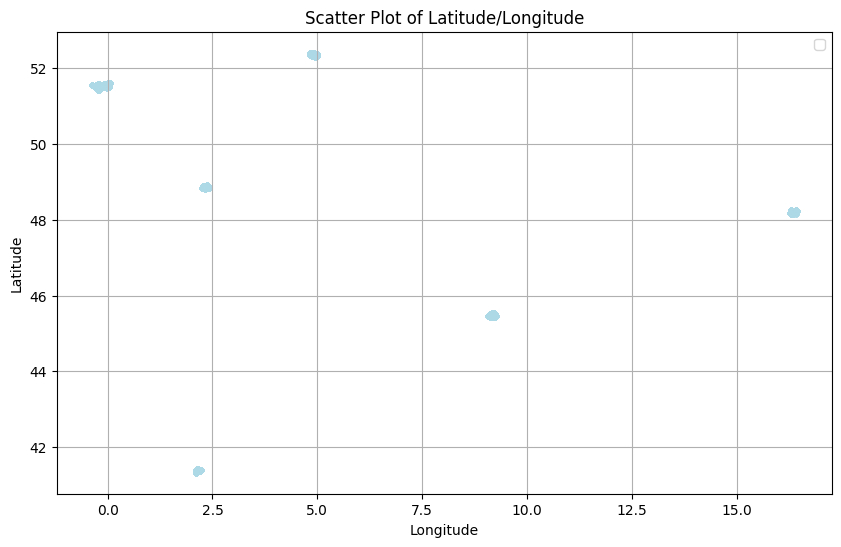

In [22]:
plt.figure(figsize=(10, 6))

plt.scatter(df_plotting['lng'], df_plotting['lat'], s=10, alpha=0.5, c='lightblue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude/Longitude')
plt.legend()
plt.grid(True)

plt.show()

4. Which property has highest reviews and lowest  in last 1 month of the dataset maximum date

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [24]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [25]:
df_lastmonth = df[['Hotel_Name','Review_Date','Total_Number_of_Reviews']]

In [26]:
df_lastmonth

,Hotel_Name,Review_Date,Total_Number_of_Reviews
0,Hotel Arena,8/3/2017,1403
1,Hotel Arena,8/3/2017,1403
2,Hotel Arena,7/31/2017,1403
3,Hotel Arena,7/31/2017,1403
4,Hotel Arena,7/24/2017,1403
...,...,...,...
515733,Atlantis Hotel Vienna,8/30/2015,2823
515734,Atlantis Hotel Vienna,8/22/2015,2823
515735,Atlantis Hotel Vienna,8/19/2015,2823
515736,Atlantis Hotel Vienna,8/17/2015,2823


In [27]:
df_lastmonth.loc[:, 'Review_Date'] = pd.to_datetime(df_lastmonth['Review_Date'])

<ipython-input-27-370e4634de89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lastmonth.loc[:, 'Review_Date'] = pd.to_datetime(df_lastmonth['Review_Date'])
<ipython-input-27-370e4634de89>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_lastmonth.loc[:, 'Review_Date'] = pd.to_datetime(df_lastmonth['Review_Date'])


In [28]:
df_lastmonth = df_lastmonth.sort_values(by = 'Review_Date', ascending = False)

In [29]:
df_lastmonth.head(3)

,Hotel_Name,Review_Date,Total_Number_of_Reviews
0,Hotel Arena,2017-08-03,1403
440581,Abba Garden,2017-08-03,959
383213,Mercure Amsterdam Sloterdijk Station,2017-08-03,3643


In [30]:
month = df_lastmonth.loc[0,'Review_Date']

In [31]:
print(month)
year_value = month.year
month_value = month.month - 1

2017-08-03 00:00:00


In [32]:
df_lastmonth['Year'] = df_lastmonth['Review_Date'].dt.year
df_lastmonth['Month'] = df_lastmonth['Review_Date'].dt.month
df_lastmonth['Day'] = df_lastmonth['Review_Date'].dt.day

In [33]:
df_lastmonth

,Hotel_Name,Review_Date,Total_Number_of_Reviews,Year,Month,Day
0,Hotel Arena,2017-08-03,1403,2017,8,3
440581,Abba Garden,2017-08-03,959,2017,8,3
383213,Mercure Amsterdam Sloterdijk Station,2017-08-03,3643,2017,8,3
383212,Mercure Amsterdam Sloterdijk Station,2017-08-03,3643,2017,8,3
104031,The Academy,2017-08-03,612,2017,8,3
...,...,...,...,...,...,...
160020,Timhotel Op ra Grands Magasins,2015-08-04,466,2015,8,4
159902,H tel Champs lys es Plaza,2015-08-04,343,2015,8,4
159875,Hotel Saint Petersbourg Opera,2015-08-04,2412,2015,8,4
416096,Catalonia Barcelona Plaza,2015-08-04,4527,2015,8,4


In [34]:
df_lastmonth = df_lastmonth[(df_lastmonth['Year'] == year_value) & (df_lastmonth['Month'] == month_value)]

In [35]:
df_lastmonth.drop(['Year','Month','Day'], axis = 1, inplace = True)

<ipython-input-35-5355695ca691>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lastmonth.drop(['Year','Month','Day'], axis = 1, inplace = True)


#Highest & Lowest Number of Reviews last month

In [36]:
df_lastmonth.head(5)

,Hotel_Name,Review_Date,Total_Number_of_Reviews
280971,Hotel SB Icaria Barcelona,2017-07-31,3633
509239,The Student Hotel Amsterdam City,2017-07-31,7656
384864,ARCOTEL Wimberger,2017-07-31,1886
305279,Enterprise Hotel Design Boutique,2017-07-31,1686
76778,Pullman Paris Tour Eiffel,2017-07-31,2764


In [37]:
max_reviews = df_lastmonth['Total_Number_of_Reviews'].max()
min_reviews = df_lastmonth['Total_Number_of_Reviews'].min()

In [38]:
# Highest

df_lastmonth[df_lastmonth['Total_Number_of_Reviews'] == max_reviews]

,Hotel_Name,Review_Date,Total_Number_of_Reviews
489352,Hotel Da Vinci,2017-07-31,16670
488414,Hotel Da Vinci,2017-07-30,16670
488413,Hotel Da Vinci,2017-07-30,16670
489355,Hotel Da Vinci,2017-07-30,16670
489354,Hotel Da Vinci,2017-07-30,16670
...,...,...,...
489407,Hotel Da Vinci,2017-07-02,16670
489406,Hotel Da Vinci,2017-07-02,16670
489405,Hotel Da Vinci,2017-07-02,16670
489404,Hotel Da Vinci,2017-07-02,16670


In [39]:
# Lowest

print(df_lastmonth[df_lastmonth['Total_Number_of_Reviews'] == min_reviews])

                 Hotel_Name Review_Date  Total_Number_of_Reviews
48789   The Henrietta Hotel  2017-07-25                       49
48790   The Henrietta Hotel  2017-07-17                       49
48791   The Henrietta Hotel  2017-07-16                       49
48792   The Henrietta Hotel  2017-07-16                       49
122493             XO Hotel  2017-07-16                       49
122494             XO Hotel  2017-07-13                       49
48780   The Henrietta Hotel  2017-07-13                       49
48793   The Henrietta Hotel  2017-07-13                       49
48794   The Henrietta Hotel  2017-07-10                       49
48795   The Henrietta Hotel  2017-07-04                       49
122495             XO Hotel  2017-07-01                       49


----

#**Natural Language Processing**

#**Joining Positive & Negative Reviews**

In [40]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [41]:
df_reviews = df[['Hotel_Name','Positive_Review','Negative_Review','Review_Total_Negative_Word_Counts','Reviewer_Score']]

In [42]:
df_reviews.columns

Index(['Hotel_Name', 'Positive_Review', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Reviewer_Score'],
      dtype='object')

In [43]:
df_reviews.head(3)

,Hotel_Name,Positive_Review,Negative_Review,Review_Total_Negative_Word_Counts,Reviewer_Score
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,397,2.9
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,0,7.5
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,42,7.1


In [44]:
df_reviews['Full_Review'] = df_reviews['Positive_Review'] + df_reviews['Negative_Review']

<ipython-input-44-dd733af20fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Full_Review'] = df_reviews['Positive_Review'] + df_reviews['Negative_Review']


In [45]:
df_reviews

,Hotel_Name,Positive_Review,Negative_Review,Review_Total_Negative_Word_Counts,Reviewer_Score,Full_Review
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,397,2.9,Only the park outside of the hotel was beauti...
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,0,7.5,No real complaints the hotel was great great ...
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,42,7.1,Location was good and staff were ok It is cut...
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,210,3.8,Great location in nice surroundings the bar a...
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,140,6.7,Amazing location and building Romantic settin...
...,...,...,...,...,...,...
515733,Atlantis Hotel Vienna,location,no trolly or staff to help you take the lugga...,14,7.0,location no trolly or staff to help you take ...
515734,Atlantis Hotel Vienna,Breakfast was ok and we got earlier check in,The hotel looks like 3 but surely not 4,11,5.8,Breakfast was ok and we got earlier check in ...
515735,Atlantis Hotel Vienna,No Positive,The ac was useless It was a hot week in vienn...,19,2.5,No Positive The ac was useless It was a hot we...
515736,Atlantis Hotel Vienna,The rooms are enormous and really comfortable...,No Negative,0,8.8,The rooms are enormous and really comfortable...


In [46]:
print(df_reviews.iloc[:,5])

0          Only the park outside of the hotel was beauti...
1          No real complaints the hotel was great great ...
2          Location was good and staff were ok It is cut...
3          Great location in nice surroundings the bar a...
4          Amazing location and building Romantic settin...
                                ...                        
515733     location no trolly or staff to help you take ...
515734     Breakfast was ok and we got earlier check in ...
515735    No Positive The ac was useless It was a hot we...
515736     The rooms are enormous and really comfortable...
515737     staff was very kind  I was in 3rd floor It di...
Name: Full_Review, Length: 515738, dtype: object


#**Data Cleaning**

In [47]:
no_reviews = df_reviews[df_reviews['Full_Review'].str.contains('No Positive|No Negative')]['Full_Review'].count()
test = df_reviews[df_reviews['Full_Review'].str.contains('Positive|Negative')]['Full_Review'].count()

print(no_reviews)
print(test)
print(df_reviews.shape)

163712
163750
(515738, 6)


In [48]:
# absent_reviews = df_reviews[df_reviews['Full_Review'].str.contains('No Positive|No Negative')]
# df_reviews = df_reviews.drop(absent_reviews.index)
# df_reviews = df_reviews.reset_index(drop=True)

----
#*1. Lower Case that column*




In [49]:
df_reviews.head(3)

,Hotel_Name,Positive_Review,Negative_Review,Review_Total_Negative_Word_Counts,Reviewer_Score,Full_Review
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,397,2.9,Only the park outside of the hotel was beauti...
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,0,7.5,No real complaints the hotel was great great ...
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,42,7.1,Location was good and staff were ok It is cut...


In [50]:
df_reviews['Full_Review'] = df_reviews['Full_Review'].str.lower()

<ipython-input-50-2464747e327c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Full_Review'] = df_reviews['Full_Review'].str.lower()


In [51]:
df_reviews.head(5)

,Hotel_Name,Positive_Review,Negative_Review,Review_Total_Negative_Word_Counts,Reviewer_Score,Full_Review
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,397,2.9,only the park outside of the hotel was beauti...
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,0,7.5,no real complaints the hotel was great great ...
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,42,7.1,location was good and staff were ok it is cut...
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,210,3.8,great location in nice surroundings the bar a...
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,140,6.7,amazing location and building romantic settin...


#*2. Remove Stop words*


In [52]:
pip install nltk

In [53]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    words = word_tokenize(text)  # Tokenize the text into words
    return ' '.join([word for word in words if word.lower() not in stop_words])

df_reviews['Full_Review'] = df_reviews['Full_Review'].apply(remove_stopwords)

<ipython-input-54-27745b30995d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Full_Review'] = df_reviews['Full_Review'].apply(remove_stopwords)


In [55]:
df_reviews.head(3)

,Hotel_Name,Positive_Review,Negative_Review,Review_Total_Negative_Word_Counts,Reviewer_Score,Full_Review
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,397,2.9,park outside hotel beautiful angry made post a...
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,0,7.5,real complaints hotel great great location sur...
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,42,7.1,location good staff ok cute hotel breakfast ra...


#3. Remove punctuations


In [56]:
from nltk.tokenize import RegexpTokenizer

# Function to remove punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return ' '.join(tokens)

# Apply the function to 'Full_Review' column
df_reviews['Full_Review'] = df_reviews['Full_Review'].apply(remove_punctuation)

<ipython-input-56-6a5bc9562986>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Full_Review'] = df_reviews['Full_Review'].apply(remove_punctuation)


In [57]:
print(df_reviews.loc[5:8,'Full_Review'])

5    good restaurant modern design great chill plac...
6    room spacious bright hotel located quiet beaut...
7    good location set lovely park friendly staff f...
8    positive even though pictures show clean rooms...
Name: Full_Review, dtype: object


#4. Apply Lemmitization/Stemming (Check accuracy with both)


In [58]:
# Stemming NLTK

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def func_stemming(sentence):
  return ' '.join([stemmer.stem(word) for word in sentence.split()])

In [59]:
df_reviews['Review_Stem'] = df_reviews['Full_Review'].apply(func_stemming)

<ipython-input-59-a7fce7f7a279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Review_Stem'] = df_reviews['Full_Review'].apply(func_stemming)


In [60]:
# Lemmatization NLTK

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def func_lemmatizer(sentence):
  return ' '.join([lemmatizer.lemmatize(word) for word in sentence.split()])

In [61]:
df_reviews['Review_Lemma'] = df_reviews['Full_Review'].apply(func_lemmatizer)

<ipython-input-61-9b6e75253473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Review_Lemma'] = df_reviews['Full_Review'].apply(func_lemmatizer)


In [62]:
df_reviews.head(3)

,Hotel_Name,Positive_Review,Negative_Review,Review_Total_Negative_Word_Counts,Reviewer_Score,Full_Review,Review_Stem,Review_Lemma
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,397,2.9,park outside hotel beautiful angry made post a...,park outsid hotel beauti angri made post avail...,park outside hotel beautiful angry made post a...
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,0,7.5,real complaints hotel great great location sur...,real complaint hotel great great locat surroun...,real complaint hotel great great location surr...
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,42,7.1,location good staff ok cute hotel breakfast ra...,locat good staff ok cute hotel breakfast rang ...,location good staff ok cute hotel breakfast ra...


Checking accuracy of both Lemmatization & Stemming

In [63]:
print(df_reviews.loc[7, 'Full_Review'])        # Original
print(df_reviews.loc[7, 'Review_Stem'])       # Stemming
print(df_reviews.loc[7, 'Review_Lemma'])    # Lemmatization

good location set lovely park friendly staff food high quality oth enjoyed breakfast apart price brekfast everything good
good locat set love park friendli staff food high qualiti oth enjoy breakfast apart price brekfast everyth good
good location set lovely park friendly staff food high quality oth enjoyed breakfast apart price brekfast everything good


#5. Apply TF/IDF & Count vectorizer


TF/IDF Vectorizer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
tfidf_vectorizer = TfidfVectorizer(max_features=1500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_reviews['Review_Stem'])

Count Vectorizer

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
cv = CountVectorizer(max_features=1500)
X_cv = cv.fit_transform(df_reviews['Review_Stem'])

#6. Apply model on target column Reviewer_Score


In [68]:
X = tfidf_matrix
y = df_reviews['Reviewer_Score']

Selecting only the first 5000 records

In [69]:
X = X[:5000]
y = y[:5000]

In [70]:
y = np.round(y).astype(int)

In [71]:
y

0        3
1        8
2        7
3        4
4        7
        ..
4995     5
4996     8
4997     8
4998    10
4999    10
Name: Reviewer_Score, Length: 5000, dtype: int64

In [72]:
X

<5000x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 82373 stored elements in Compressed Sparse Row format>

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Apply Random Forest Regression

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)  # Example with 100 trees
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

#Predictions

In [75]:
y_pred = rf_regressor.predict(X_test)

In [ ]:
print(y_pred)

#Model Evaluation

In [76]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of Random Forest Regressor: {mae}")

Mean Absolute Error of Random Forest Regressor: 1.0824382076807602


#**Conclusion**:

*The developed model, utilizing a Random Forest Regressor, demonstrates promising performance in predicting the 'Reviewer_Score' based on the extracted features from the hotel reviews dataset. With a mean absolute error of approximately 1.08, the model exhibits relatively accurate predictions, with deviations of around 1.08 on average from the actual review scores. Although further fine-tuning and optimization might be explored to enhance its accuracy, this model provides a solid foundation for predicting reviewer scores based on the provided review data*

----